<a href="https://www.kaggle.com/code/azminetoushikwasi/netflix-finding-similar-movies-basic-nlp?scriptVersionId=106286781" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--THrf5Yjw--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://dev-to-uploads.s3.amazonaws.com/uploads/articles/n6brz4p7iq7j1mulo1nv.jpg">

**Netflix, Inc.** is an American subscription streaming service and production company based in Los Gatos, California. 

Netflix is a **subscription-based streaming service** that allows our members to watch TV shows and movies without commercials on an internet-connected device. You can also download TV shows and movies to your iOS, Android, or Windows 10 device and watch without an internet connection.

- **Stock price:** NFLX (NASDAQ) $236.25 +12.13 (+5.41%) - Sep 15, 12:18 PM EDT
- **Founded:** August 29, 1997, Scotts Valley, California
- **Revenue:** 29.7 billion USD (2021)

# 📗 Modules and Settings 

In [1]:
import numpy as np
import pandas as pd

import nltk
import re

import warnings

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram

In [4]:
np.random.seed(5)
warnings.filterwarnings('ignore')

# 📃 Data: Soucre and Desciption 

### **Main Dataset:** 
- [Netflix Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/netflix-shows) by @shivamb

### **Supporting Datasets:**
- [1000 Netflix Shows](https://www.kaggle.com/datasets/chasewillden/netflix-shows)
- [TV shows on Netflix, Prime Video, Hulu and Disney+](https://www.kaggle.com/datasets/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney) by ruchi798
- [Netflix TV Shows and Movies](https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies) by @victorsoeiro

In [5]:
df=pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 📇 Exploring Dataset

## 💿 Releases per day

In [6]:
px.histogram(df, x='date_added', color="type", barmode='stack')

## 🖥 Ratings

In [7]:
px.histogram(df, x='rating', color="type", barmode='stack')

# 📋 Tokenize Descriptions

**Tokenization is one of the first step in any NLP pipeline**. Tokenization is nothing but splitting the raw text into small chunks of words or sentences, called tokens. If the text is split into words, then its called as 'Word Tokenization' and if it's split into sentences then its called as 'Sentence Tokenization'.

### What's token in NLP?
A token is an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing. A type is the class of all tokens containing the same character sequence.

### What is meant by tokenization?
Tokenization refers to a process by which a piece of sensitive data, such as a credit card number, is replaced by a surrogate value known as a token. The sensitive data still generally needs to be stored securely at one centralized location for subsequent reference and requires strong protections around it.

### What is tokenization in NLP Python?

In Python tokenization basically refers to splitting up a larger body of text into smaller lines, words or even creating words for a non-English language. The various tokenization functions in-built into the nltk module itself and can be used in programs as shown below.

### Why is tokenization important in NLP?
While tokenization is well known for its use in cybersecurity and in the creation of NFTs, tokenization is also an important part of the NLP process. Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning.

In [8]:
print(df['description'][0])

sent_tokenized = [sent for sent in nltk.sent_tokenize(df['description'][0])]

words_tokenized = [word for word in nltk.word_tokenize(sent_tokenized[0])]

As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.


In [9]:
filtered_words = [word for word in words_tokenized if re.search('[a-zA-Z]', word)]

filtered_words

['As',
 'her',
 'father',
 'nears',
 'the',
 'end',
 'of',
 'his',
 'life',
 'filmmaker',
 'Kirsten',
 'Johnson',
 'stages',
 'his',
 'death',
 'in',
 'inventive',
 'and',
 'comical',
 'ways',
 'to',
 'help',
 'them',
 'both',
 'face',
 'the',
 'inevitable']

# 📄 Stemming

Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

Stemming is a technique used to extract the base form of the words by removing affixes from them. It is just like cutting down the branches of a tree to its stems. For example, the stem of the words eating, eats, eaten is eat.

Stemming and Lemmatization are algorithms that are used in Natural Language Processing (NLP) to normalize text and prepare words and documents for further processing in Machine Learning. In NLP, for example, you may want to acknowledge the fact that the words “like” and “liked” are the same word in different tenses.

In [10]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [11]:
print("Without stemming: ", filtered_words)

Without stemming:  ['As', 'her', 'father', 'nears', 'the', 'end', 'of', 'his', 'life', 'filmmaker', 'Kirsten', 'Johnson', 'stages', 'his', 'death', 'in', 'inventive', 'and', 'comical', 'ways', 'to', 'help', 'them', 'both', 'face', 'the', 'inevitable']


In [12]:
stemmed_words = [stemmer.stem(t) for t in filtered_words]

print("After stemming:   ", stemmed_words)

After stemming:    ['as', 'her', 'father', 'near', 'the', 'end', 'of', 'his', 'life', 'filmmak', 'kirsten', 'johnson', 'stage', 'his', 'death', 'in', 'invent', 'and', 'comic', 'way', 'to', 'help', 'them', 'both', 'face', 'the', 'inevit']


# 📒 Function to Tokenize and Stem

In [13]:
def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [14]:
text = df['description'][3]

print("Text:\n",text,"\n\n\nTokenised and Stemmed:\n",tokenize_and_stem(text))

Text:
 Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series. 


Tokenised and Stemmed:
 ['feud', 'flirtat', 'and', 'toilet', 'talk', 'go', 'down', 'among', 'the', 'incarcer', 'women', 'at', 'the', 'orlean', 'justic', 'center', 'in', 'new', 'orlean', 'on', 'this', 'gritti', 'realiti', 'seri']


# 📖 Tfidf Vectorizer

TfidfVectorizer is the base building block of many NLP pipelines. It is a simple technique to vectorize text documents — i.e. transform sentences into arrays of numbers — and use them in subsequent tasks.
TF-IDF is one of the most popular text vectorizers, the calculation is very simple and easy to understand. It gives the rare term high weight and gives the common term low weight.

### What is a TfidfVectorizer?

**Term Frequency Inverse Document Frequency (TFIDF)**

TFIDF works by proportionally increasing the number of times a word appears in the document but is counterbalanced by the number of documents in which it is present.

TF-IDF = TF(t, d) x IDF(t), where, TF(t, d) = Number of times term "t" appears in a document "d". IDF(t) = Inverse document frequency of the term t. The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features. FastText and Word2Vec Word Embeddings Python Implementation

## Declaring TfidfVectorizer

In [15]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=2000000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))

## Fit-Tranform TfidfVectorizer

In [16]:
tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in df["description"]])

# 🗃 Clustering

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

Clustering is used to identify groups of similar objects in datasets with two or more variable quantities. In practice, this data may be collected from marketing, biomedical, or geospatial databases, among many other places.

In [17]:
km = KMeans(n_clusters=6)

km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

df["cluster"] = clusters
df['cluster'].value_counts() 

0    6933
1    1874
Name: cluster, dtype: int64

# 🧮 Calculating Similiarity

In [18]:
similarity_distance = 1 - cosine_similarity(tfidf_matrix)

In [19]:
similarity_distance[:10]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.]])

# 🖥 Plotting

In [20]:
mergings = linkage(similarity_distance, method='complete')

In [21]:
mergings

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 8.80700000e+03, 0.00000000e+00, 3.00000000e+00],
       [3.00000000e+00, 8.80800000e+03, 0.00000000e+00, 4.00000000e+00],
       ...,
       [8.80400000e+03, 1.76070000e+04, 0.00000000e+00, 6.93200000e+03],
       [8.80500000e+03, 1.76100000e+04, 0.00000000e+00, 6.93300000e+03],
       [1.76090000e+04, 1.76110000e+04, 4.32897216e+01, 8.80700000e+03]])

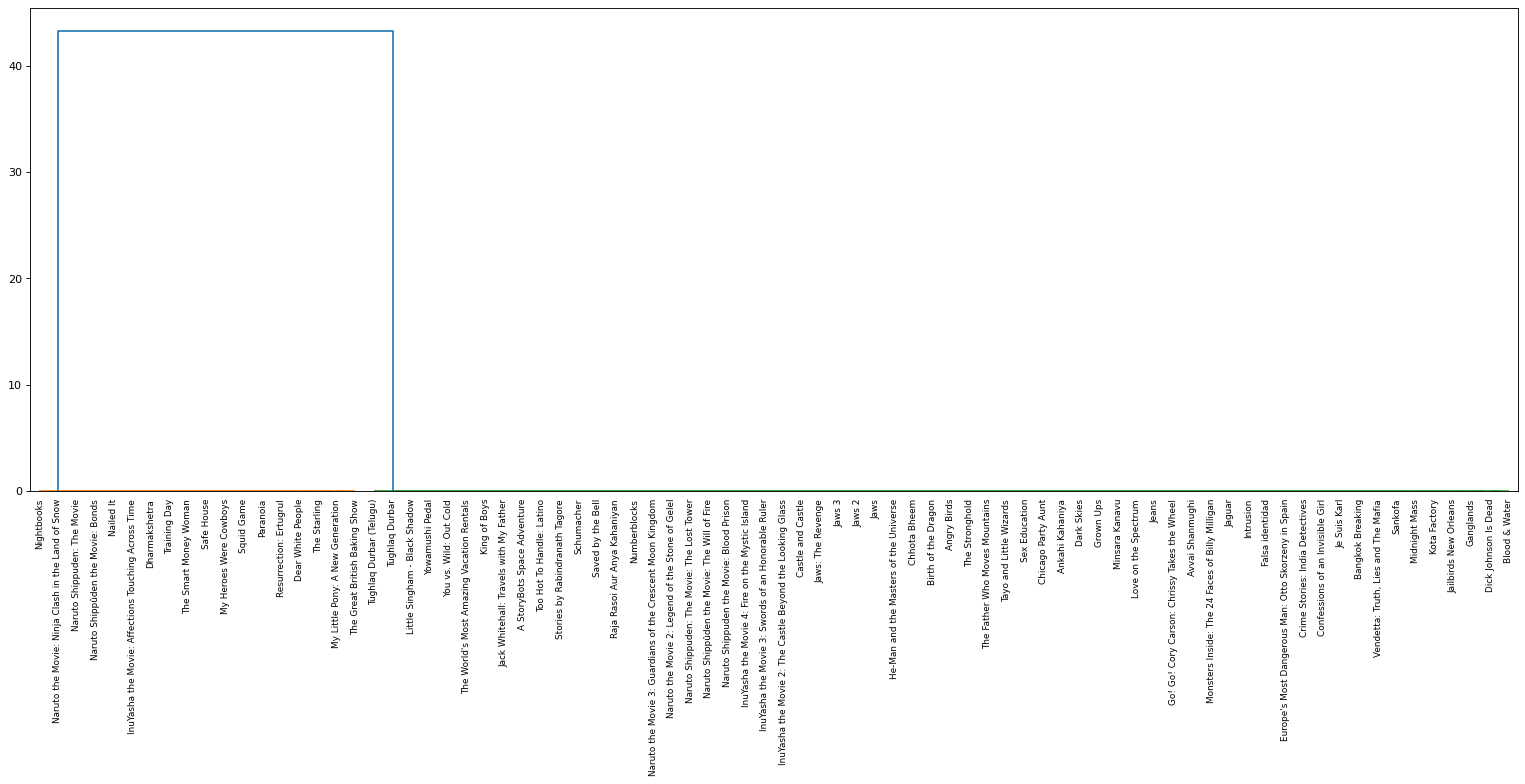

In [22]:
from matplotlib.pyplot import figure
import sys

sys.setrecursionlimit(10000)

figure(figsize=(24, 8), dpi=80)

N =80

mergings = linkage(similarity_distance[:N], method='complete')
m=mergings;
l=df["title"][:N].to_list()

dendrogram_ = dendrogram(m,
               labels=l,
               leaf_rotation=90,
               leaf_font_size=8,
)